In [30]:
%load_ext autoreload
%autoreload 2

import os, sys
import numpy
from collections import defaultdict, Counter, OrderedDict
import datetime


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
print(os.getcwd())
sys.path.insert(0, str(os.path.dirname(os.path.realpath(os.getcwd()))))
print(sys.path)

/mnt/f/dev/git/miRExplore/python/nbs
['/mnt/f/dev/git/miRExplore/python', '/mnt/f/dev/git/miRExplore/python/nbs', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/mjoppich/.local/lib/python3.8/site-packages', '/home/mjoppich/.local/lib/python3.8/site-packages/pIMZ-1.0-py3.8-linux-x86_64.egg', '/home/mjoppich/.local/lib/python3.8/site-packages/progressbar-2.5-py3.8.egg', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/local/lib/python3.8/dist-packages/mpld3-0.3.1.dev1-py3.8.egg', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/home/mjoppich/.ipython']


In [7]:
%autoreload 2
from textdb.PubmedDateDB import PubmedDateDB
%autoreload 2
from synonymes.mirnaID import miRNA, miRNAPART
%autoreload 2
from textdb.MiGenRelDB import MiGenRelDB,MiRGeneRel
%autoreload 2
from synonymes.GeneOntology import GeneOntology
%autoreload 2
from textdb.PMID2XDB import PMID2XDB

from textdb.MirTarBaseDB import MirTarBaseDB
from analysis.miRecordDB import miRecordDB
from textdb.DIANATarbaseDB import DIANATarbaseDB

In [9]:
pmidBase ="/mnt/d/dev/data/pmid_jun2020/aggregated_pmid/"
pmcBase ="/mnt/d/dev/data/pmid_jun2020/aggregated_pmc/"

obodir = "/mnt/d/dev/data/pmid_jun2020/obodir/"

fileDir = os.path.dirname(os.path.realpath(os.getcwd()))

In [5]:
from utils.tmutils import normalize_gene_names
normGeneSymbols = normalize_gene_names(path="/mnt/d/owncloud/data/miRExplore/obodir/" + "/hgnc_no_withdrawn.syn")

In [8]:
print("Loading hsa")
mirelPMIDhsa = MiGenRelDB.loadFromFile(pmidBase + "/mirna_gene.hsa.pmid", ltype="mirna", rtype="gene", normGeneSymbols=normGeneSymbols, switchLR=True, stopAfter=-1)
print("Loading mmu")
mirelPMIDmmu = MiGenRelDB.loadFromFile(pmidBase + "/mirna_gene.mmu.pmid", ltype="mirna", rtype="gene", normGeneSymbols=normGeneSymbols, switchLR=True, stopAfter=-1)

relDBs = [mirelPMIDhsa, mirelPMIDmmu]

Loading hsa
Gene Symbols Normalized 77586
Loaded file /mnt/d/dev/data/pmid_jun2020/aggregated_pmid//mirna_gene.hsa.pmid
Accepted Doc IDs 40616
Rejected Doc IDs 0
Seen genes 7895
Seen miRNAs 2086
Seen Harm. miRNAs 1606
Loading mmu
Gene Symbols Normalized 12789
Loaded file /mnt/d/dev/data/pmid_jun2020/aggregated_pmid//mirna_gene.mmu.pmid
Accepted Doc IDs 36864
Rejected Doc IDs 0
Seen genes 6379
Seen miRNAs 2015
Seen Harm. miRNAs 1565


In [10]:
print("Loading hsa")
mirelPMChsa = MiGenRelDB.loadFromFile(pmcBase + "/mirna_gene.hsa.pmid", ltype="mirna", rtype="gene", normGeneSymbols=normGeneSymbols, switchLR=True, stopAfter=-1)
print("Loading mmu")
mirelPMCmmu = MiGenRelDB.loadFromFile(pmcBase + "/mirna_gene.mmu.pmid", ltype="mirna", rtype="gene", normGeneSymbols=normGeneSymbols, switchLR=True, stopAfter=-1)

relDBPMC = [mirelPMChsa, mirelPMCmmu]

Loading hsa
Gene Symbols Normalized 104649
Loaded file /mnt/d/dev/data/pmid_jun2020/aggregated_pmc//mirna_gene.hsa.pmid
Accepted Doc IDs 10749
Rejected Doc IDs 0
Seen genes 6911
Seen miRNAs 1868
Seen Harm. miRNAs 1312
Loading mmu
Gene Symbols Normalized 23456
Loaded file /mnt/d/dev/data/pmid_jun2020/aggregated_pmc//mirna_gene.mmu.pmid
Accepted Doc IDs 10647
Rejected Doc IDs 0
Seen genes 6056
Seen miRNAs 1872
Seen Harm. miRNAs 1323


In [11]:
tmInteractions = set()

for rdb in relDBs:

    for gene in rdb.ltype2rel:

        for rel in rdb.ltype2rel[gene]:

            mirObj = miRNA(rel.rid)

            #fullMirna = mirObj.getStringFromParts([miRNAPART.MATURE, miRNAPART.ID, miRNAPART.PRECURSOR, miRNAPART.MATURE_SEQS, miRNAPART.ARM])
            baseMirna = mirObj.getStringFromParts([miRNAPART.MATURE, miRNAPART.ID, miRNAPART.PRECURSOR])
            intTuple = (rel.lid, baseMirna)

            tmInteractions.add(intTuple)

In [12]:
tmInteractionsPMC = set()

for rdb in relDBPMC:

    for gene in rdb.ltype2rel:

        for rel in rdb.ltype2rel[gene]:

            mirObj = miRNA(rel.rid)

            #fullMirna = mirObj.getStringFromParts([miRNAPART.MATURE, miRNAPART.ID, miRNAPART.PRECURSOR, miRNAPART.MATURE_SEQS, miRNAPART.ARM])
            baseMirna = mirObj.getStringFromParts([miRNAPART.MATURE, miRNAPART.ID, miRNAPART.PRECURSOR])
            intTuple = (rel.lid, baseMirna)

            tmInteractionsPMC.add(intTuple)

In [13]:
len(tmInteractions)

53791

In [14]:
len(tmInteractionsPMC)

54499

In [44]:
"SMAD5" in normGeneSymbols

False

In [43]:
gene="SMAD 5"
gene[-2] == ' ' and gene.replace(" ", "") in normGeneSymbols

True

In [15]:
recordsDB = miRecordDB.loadFromFile(filelocation=fileDir + "/dbs/mirecords_v4.xlsx", normGeneSymbols=normGeneSymbols)

/mnt/f/dev/git/miRExplore/python/dbs/mirecords_v4.xlsx
new
SMAD1 GARS
SMAD1 GARS
SMAD5 SMAD5
SMAD1 GARS
SMAD1 GARS
SMAD5 SMAD5
SMAD5 SMAD5
SMAD1 GARS
SMAD1 GARS
SMAD3 SMAD3
SMAD2 SMAD2
SMAD3 SMAD3
SMAD 4 SMAD4
SMAD 5 SMAD5
SMAD3 SMAD3
SMAD 4 SMAD4
SMAD 5 SMAD5
SMAD3 SMAD3
SMAD 4 SMAD4
SMAD 5 SMAD5
Gene Symbols Normalized 280


In [16]:
list(recordsDB.all_ltypes)[:5]

['CENPJ', 'TFAP4', 'CEBPB', 'DLL1', 'KCNQ1']

In [17]:
mirecordsInteractions = set()

for gene in recordsDB.ltype2rel:

    for rel in recordsDB.ltype2rel[gene]:

        mirObj = miRNA(rel.rid)

        #fullMirna = mirObj.getStringFromParts([miRNAPART.MATURE, miRNAPART.ID, miRNAPART.PRECURSOR, miRNAPART.MATURE_SEQS, miRNAPART.ARM])
        baseMirna = mirObj.getStringFromParts([miRNAPART.MATURE, miRNAPART.ID, miRNAPART.PRECURSOR])
        intTuple = (rel.lid, baseMirna)

        mirecordsInteractions.add(intTuple)

In [18]:
len(mirecordsInteractions)

1851

In [19]:
mirtarbaseDB = MirTarBaseDB.loadFromFile(filepath=fileDir + "/dbs/miRTarBase.csv", normGeneSymbols=normGeneSymbols)

Gene Symbols Normalized 0


In [20]:
mirtarbaseInteractions = set()

for gene in mirtarbaseDB.ltype2rel:

    for rel in mirtarbaseDB.ltype2rel[gene]:

        mirObj = miRNA(rel.rid)

        #fullMirna = mirObj.getStringFromParts([miRNAPART.MATURE, miRNAPART.ID, miRNAPART.PRECURSOR, miRNAPART.MATURE_SEQS, miRNAPART.ARM])
        baseMirna = mirObj.getStringFromParts([miRNAPART.MATURE, miRNAPART.ID, miRNAPART.PRECURSOR])
        intTuple = (rel.lid, baseMirna)

        mirtarbaseInteractions.add(intTuple)

In [21]:
len(mirtarbaseInteractions)

355150

In [22]:
dianaDB, celllInfos = DIANATarbaseDB.loadFromFile(fileDir + "/dbs/hsa_mmu.diana.csv", normGeneSymbols=normGeneSymbols)

In [23]:
dianaInteractions = set()

for gene in dianaDB.ltype2rel:

    for rel in dianaDB.ltype2rel[gene]:

        mirObj = miRNA(rel.rid)

        #fullMirna = mirObj.getStringFromParts([miRNAPART.MATURE, miRNAPART.ID, miRNAPART.PRECURSOR, miRNAPART.MATURE_SEQS, miRNAPART.ARM])
        baseMirna = mirObj.getStringFromParts([miRNAPART.MATURE, miRNAPART.ID, miRNAPART.PRECURSOR])
        intTuple = (rel.lid, baseMirna)

        dianaInteractions.add(intTuple)

In [24]:
len(dianaInteractions)

417820

In [31]:
source2interactions = OrderedDict()
source2interactions["miRExplore/PMID"] = tmInteractions
source2interactions["miRExplore/PMC"] = tmInteractionsPMC
source2interactions["miRecords"] = mirecordsInteractions
source2interactions["miRTarBase"] = mirtarbaseInteractions
source2interactions["DIANA-TarBase"] = dianaInteractions

In [26]:
list(dianaInteractions)[:10]

[('CCNL2', 'miR-10a'),
 ('STX6', 'miR-1a'),
 ('IDS', 'miR-548i'),
 ('CAMK2N1', 'miR-577'),
 ('PIK3C2A', 'miR-25'),
 ('ANAPC13', 'miR-32'),
 ('CLINT1', 'miR-582'),
 ('SH3TC1', 'let-7b'),
 ('AP1G1', 'miR-1910'),
 ('BGN', 'miR-542')]

In [27]:
for x in source2interactions:
    print(x, ('UBXN4', 'miR-548a') in source2interactions[x])
    print(x, ('UBXDC1', 'miR-548a') in source2interactions[x])
    print(x, ('UBXD2', 'miR-548a') in source2interactions[x])

miRExplore/PMID False
miRExplore/PMID False
miRExplore/PMID False
miRExplore/PMC False
miRExplore/PMC False
miRExplore/PMC False
miRecords False
miRecords False
miRecords False
miRTarBase False
miRTarBase False
miRTarBase False
DIANA-TarBase True
DIANA-TarBase False
DIANA-TarBase False


In [28]:
from upsetplot import from_contents,plot
import matplotlib.pyplot as plt

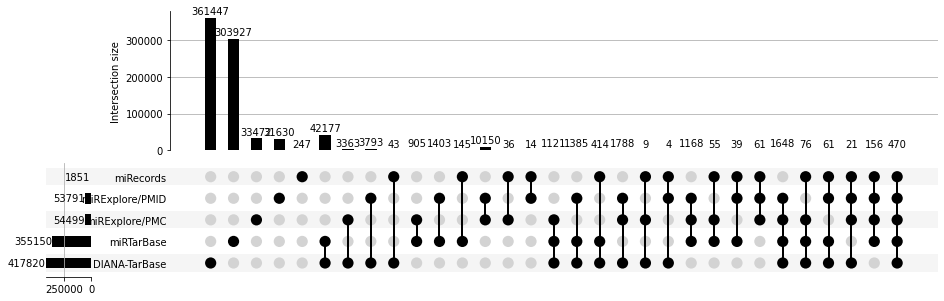

In [32]:
upIn = from_contents(source2interactions)
plot(upIn, subset_size="auto", show_counts =True)
plt.savefig("database_overlap.png")